Name: Ali Gowani <br>
Contact: https://www.linkedin.com/in/aliagowani/<br><br>

Title: Regression Experiment for Intelligent Contact Center Employee performance<br>
Pycaret Version: 2.1<br><br>
Created: Monday, August 24, 2020 <br>
Updated: January 23, 2021 <br>
<br>

Use Jupyter Notebook Viewer to view this notebook properly: https://nbviewer.jupyter.org/github/aliagowani/Pycaret_2.1_Regression_EmployeePerformance/blob/master/Pycaret_2.1_Regression_EmployeePerformance.ipynb

## 0. Overview: Real-Life Employee Performance Case in Machine Learning (Regression) using Pycaret 2.1

We are going to utilize a low-code Machine Learning Python library, Pycaret (version 2.1), to predict the First Call Resolution (FCR) metric for Customer Service Agents (Employees) in Call Centers. FCR is an important metric in a call center as it indicates the percentage of issues that were resolved when the customer called the first time. We want to ensure that customers do not keep calling back to resolve an issue as it costs the company money when the issue is not resolved the first time.

Below is the approach we will take to predict a Customer Service Agent or Contact Agents FCR metric:
<ol>
<li>Conduct Exploratory Data Analysis (EDA) on the real data from a global call center.</li>
<li>Execute regression models to determine how accurately we can predict the FCR metric for each employee.</li>
<li>Create a classification indicator to determine whether predicting an employee's increase or decrease in FCR metric performance is more meaningful than regression.</li>
</ol>

We will leverage a real-case data from a business process outsourcer (BPO) that supports many Fortune 500 companies. *Note: dataset has been sanitized of personal information as it is a real dataset.

Let's get started!

## 1. Load Libraries

In [1]:
# Import libraries for data processing.
import numpy as np
import pandas as pd
import warnings
import time
warnings.filterwarnings('ignore')

# Import libraries for visualization and set default values.
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])

# Import sklearn and configure display setting.
#from sklearn import set_config
#set_config(display='text')

In [2]:
# Install and import Pycaret library for transformation and classification.
# !pip install pycaret
from pycaret.classification import *

# Confirm Pycaret version is 2.1
from pycaret.utils import version
print('Confirm Pycaret version is >2.2.x?')
print('Pycaret Version: ', version())

Confirm Pycaret version is >2.2.x?
Pycaret Version:  2.3.1


## 2. Load Dataset

In [3]:
# Load Dataset.
# url = 'https://raw.githubusercontent.com/aliagowani/Pycaret_2.1_Regression_EmployeePerformance/master/employee_performance.csv?token=AMLWIYQHZO4XANFWX3IP5B27LGQIY'
# dataset = pd.read_csv(url)

# Initiate local directory
import os
os.getcwd()
os.chdir('/Users/aliagowani/Documents/GitHub/Pycaret_2.1_Regression_EmployeePerformance/data/2021 05 07')
dataset = pd.read_csv('aht_comcast_prediction.csv')

# Create a classification feature to determine whether the agent increased or decreased in performance
# dataset['actualvalue_class'] = np.where(dataset['actualvalue'] >= dataset['Friday'], '1', '0').astype(int)

In [4]:
import glob 
files = glob.glob('*.{}'.format('csv'))
print(files)

df_aht = pd.read_csv('aht_comcast_prediction.csv')
df_aicr = pd.read_csv('aicr_comcast_prediction.csv')
df_cpc = pd.read_csv('cpc_comcast_prediction.csv')
df_itg = pd.read_csv('itg_comcast_prediction.csv')
df_itg20 = pd.read_csv('itg20_comcast_prediction.csv')
df_nps = pd.read_csv('nps_comcast_prediction.csv')
df_ntt = pd.read_csv('ntt_comcast_prediction.csv')
df_sentiment = pd.read_csv('sentiment_comcast_prediction.csv')
df_surveycount = pd.read_csv('surveycount_comcast_prediction.csv')
df_transfer = pd.read_csv('transfer_comcast_prediction.csv')
df_tsr = pd.read_csv('tsr_comcast_prediction.csv')



['cpc_comcast_prediction.csv', 'tsr_comcast_prediction.csv', 'sentiment_comcast_prediction.csv', 'transfer_comcast_prediction.csv', 'surveycount_comcast_prediction.csv', 'itg20_comcast_prediction.csv', 'aht_comcast_prediction.csv', 'itg_comcast_prediction.csv', 'aicr_comcast_prediction.csv', 'nch_comcast_prediction.csv', 'ntt_comcast_prediction.csv', 'nps_comcast_prediction.csv']


In [5]:
df = []

df = pd.merge(df_nps, df_aicr[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week_y':'df_aicr_previous_week'}, inplace=True)

df = pd.merge(df, df_cpc[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_cpc_previous_week'}, inplace = True)

df = pd.merge(df, df_itg[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_itg_previous_week'}, inplace = True)

df = pd.merge(df, df_itg20[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_itg20_previous_week'}, inplace = True)

df = pd.merge(df, df_aht[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_aht_previous_week'}, inplace = True)

df = pd.merge(df, df_ntt[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_ntt_previous_week'}, inplace = True)

df = pd.merge(df, df_sentiment[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_sentiment_previous_week'}, inplace = True)

df = pd.merge(df, df_surveycount[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_surveycount_previous_week'}, inplace = True)

df = pd.merge(df, df_transfer[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_transfer_previous_week'}, inplace = True)

df = pd.merge(df, df_tsr[['employeeid', 'previous week']], on='employeeid', how='left')
df.rename(columns = {'previous week':'df_tsr_previous_week'}, inplace = True)

In [6]:
# Drop observations where Actual Value is NaN as this is our Label
print("Shape of dataset before drop (observations, features):", df.shape)
df = df.dropna(axis=0, subset=['actual week', 'previous week_x'])
print("Shape of dataset after drop (observations, features):", df.shape)
# Drop Agent_ID from correlation dataset.
dataset = []
dataset = df
dataset = dataset.drop('Unnamed: 0', axis=1)
print("Shape of dataset after drop (observations, features):", dataset.shape)
dataset.columns

Shape of dataset before drop (observations, features): (270, 22)
Shape of dataset after drop (observations, features): (69, 22)
Shape of dataset after drop (observations, features): (69, 21)


Index(['employeeid', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'previous week_x', 'actual week', 'label',
       'df_aicr_previous_week', 'df_cpc_previous_week', 'df_itg_previous_week',
       'df_itg20_previous_week', 'df_aht_previous_week',
       'df_ntt_previous_week', 'df_sentiment_previous_week',
       'df_surveycount_previous_week', 'df_transfer_previous_week',
       'df_tsr_previous_week'],
      dtype='object')

## 3. Exploratory Data Analysis (EDA)

In [7]:
# Below is a high-level description of each feature. The data set is comprised of 102 agents and we have 19 features to evaluate. The data is between the time period of June 1, 2020 and July 31, 2020, with the 'Actual Value' as the Actual FCR value of each agent for August 7, 2020. The goal is to create a model that predicts the FCR for an employee can have at the end of the week (Friday). 

# 'Agent_ID': unique identifier of the employee or agent.
# 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday': shows the FCR percent for each agent as an aggregate (mean). The higher the percentage the higher the rate at which the customer's issue was resolved in the first call. 
# 'Site': city location of the call center.
# 'Function_Field': this is the role of the employee. In our case, it should all be Agents. 
# 'tenure': tenure of the agent at the company in months. 
# 'Total number of calls': number of all phone calls taken by the agent in the given timeframe.
# 'Assistance': percentage of time the agent needed to provide additional assistance by escalating to supervisor. 
# 'Recommend': percentage of time the agent would be recommended by the customer to resolve an issue. 
# 'CSat': average survey response (on a scale from 1 (least satisfied) to 5 (most satisfied)) that the customer was satisfied with the experience. 
# 'total coaching': number of times the agent received coaching sessions from supervisor to improve FCR metric in the given timeframe. 
# 'total coaching improved': number of times the agent's FCR value increased after a week from the initial coaching. 
# 'Actual Value': the label we are trying to predict. It is the next Friday (August 7, 2020) FCR value for the agent. 
# 'FCR Week before': a strong indicator is how well the agent performed the previous Friday. This is the FCR value for the Friday before the predicted value ('Actual Value'). 

# Describe the features in the dataset, such as, count, mean, standard deviation, min, max, etc.
print("Shape of dataset (observations, features):", dataset.shape)
dataset.head(5).round(2)

Shape of dataset (observations, features): (69, 21)


,employeeid,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,previous week_x,actual week,label,df_aicr_previous_week,df_cpc_previous_week,df_itg_previous_week,df_itg20_previous_week,df_aht_previous_week,df_ntt_previous_week,df_sentiment_previous_week,df_surveycount_previous_week,df_transfer_previous_week,df_tsr_previous_week
2,1140929,64.29,75.00,81.82,36.85,-33.33,0.00,33.33,75.0,33.33,0,71.26,0.91,75.08,1.00,1730.86,NaN,NaN,1.50,6.24,0.00
5,1193063,-25.00,-33.33,-12.50,-25.00,-17.64,-60.00,50.00,50.0,33.33,0,47.48,0.85,69.56,0.86,1222.62,NaN,NaN,1.33,0.00,0.00
7,1208130,-75.00,-12.50,-15.00,-15.00,37.50,-15.00,-10.00,0.0,-50.00,0,62.36,0.83,75.29,1.00,1166.33,NaN,NaN,1.00,12.44,0.00
13,1270231,-50.00,-37.50,-35.71,25.00,48.15,5.56,100.00,0.0,-50.00,0,66.87,1.00,79.02,1.00,857.11,NaN,NaN,1.00,16.23,0.00
15,1280352,19.44,0.00,33.33,-16.67,100.00,100.00,-100.00,100.0,-100.00,0,52.89,0.97,69.75,1.00,1444.44,NaN,NaN,1.00,10.35,1.11


In [8]:
dataset_corr = dataset.corr().round(4)
dataset.head(5).round(2)

,employeeid,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,previous week_x,actual week,label,df_aicr_previous_week,df_cpc_previous_week,df_itg_previous_week,df_itg20_previous_week,df_aht_previous_week,df_ntt_previous_week,df_sentiment_previous_week,df_surveycount_previous_week,df_transfer_previous_week,df_tsr_previous_week
2,1140929,64.29,75.00,81.82,36.85,-33.33,0.00,33.33,75.0,33.33,0,71.26,0.91,75.08,1.00,1730.86,NaN,NaN,1.50,6.24,0.00
5,1193063,-25.00,-33.33,-12.50,-25.00,-17.64,-60.00,50.00,50.0,33.33,0,47.48,0.85,69.56,0.86,1222.62,NaN,NaN,1.33,0.00,0.00
7,1208130,-75.00,-12.50,-15.00,-15.00,37.50,-15.00,-10.00,0.0,-50.00,0,62.36,0.83,75.29,1.00,1166.33,NaN,NaN,1.00,12.44,0.00
13,1270231,-50.00,-37.50,-35.71,25.00,48.15,5.56,100.00,0.0,-50.00,0,66.87,1.00,79.02,1.00,857.11,NaN,NaN,1.00,16.23,0.00
15,1280352,19.44,0.00,33.33,-16.67,100.00,100.00,-100.00,100.0,-100.00,0,52.89,0.97,69.75,1.00,1444.44,NaN,NaN,1.00,10.35,1.11


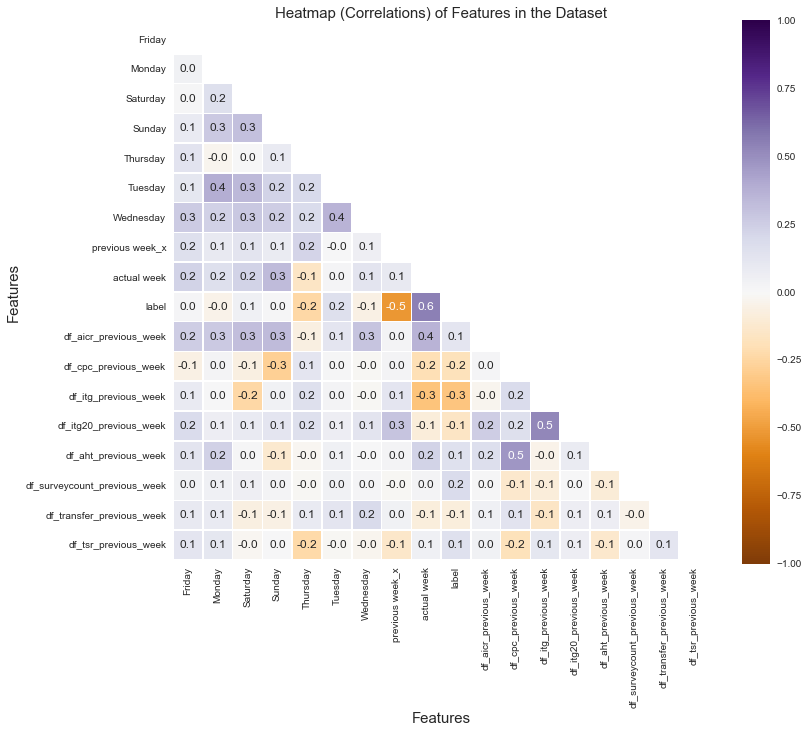

In [9]:
# Create a correlation for the dataset.
dataset_corr = dataset.corr().round(4)

# Drop Agent_ID from correlation dataset.
dataset_corr = dataset_corr.drop(['employeeid'], axis=1)
dataset_corr = dataset_corr.drop(['employeeid'], axis=0)

# Create a correlation matrix. Only bottom left corner valued. 
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn. 
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

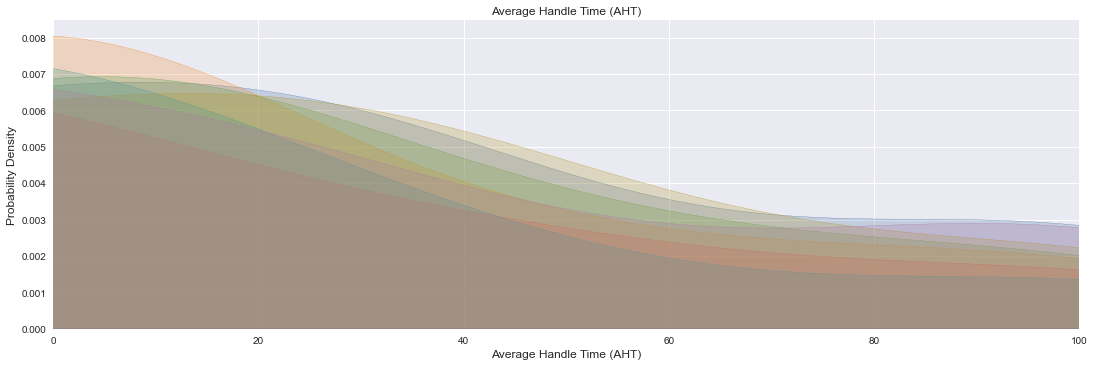

In [10]:
# Visualize the FCR for specific day in the probability density chart. 
facet = sns.FacetGrid(dataset, aspect = 3, height=5)
facet.map(sns.kdeplot, 'Sunday', shade = True, color='#4E79A7')
facet.map(sns.kdeplot, 'Monday', shade = True, color='#F28E2B')
facet.map(sns.kdeplot, 'Tuesday', shade = True, color='#59A14F')
facet.map(sns.kdeplot, 'Wednesday', shade = True, color='#E15759')
facet.map(sns.kdeplot, 'Thursday', shade = True, color='#B6992D')
facet.map(sns.kdeplot, 'Friday', shade = True, color='#499894')
facet.map(sns.kdeplot, 'Saturday', shade = True, color='#B07AA1')
facet.set(xlim = (0, dataset['Thursday'].max()))
facet.add_legend()
plt.title('Average Handle Time (AHT)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.xlabel('Average Handle Time (AHT)', fontsize=12)
plt.show()

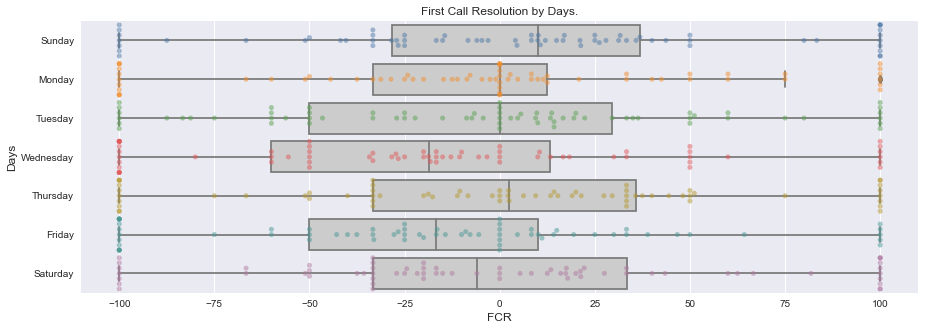

In [11]:
# Visualize the dispersion of FCR values in a given day and identify the outliers. 
dataset_boxplot = pd.DataFrame(data = dataset, columns = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Create a color set that matches the probability density chart. 
my_pal = {'Sunday': '#4E79A7','Monday': '#F28E2B', 'Tuesday': '#59A14F', 'Wednesday': '#E15759', 'Thursday': '#B6992D', 'Friday': '#499894', 'Saturday': '#B07AA1'}

# Generate a boxplot using Seaborn. 
dataset_boxplot = pd.DataFrame(data = dataset, columns = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.figure(figsize=(15,5))
sns.boxplot(x="value", y="variable", data=pd.melt(dataset_boxplot), color='#cccccc')
sns.swarmplot(x="value", y="variable", data=pd.melt(dataset_boxplot), palette=my_pal, alpha=0.5)
plt.title('First Call Resolution by Days.', fontsize=12)
plt.ylabel('Days', fontsize=12)
plt.xlabel('FCR', fontsize=12)
plt.show()

## 4. Conduct Regression Model in Pycaret

In [12]:
# Transform dataset (transform, bin and create dummy variables) and split the dataset. In addition, we are logging experiments and plots for those experiment to be viewed later with MLflow. 
from pycaret.classification import *

class_aht = setup(data=dataset, target='label', session_id=786, transformation=True, normalize=False, train_size=0.75, numeric_features=('Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'previous week_x', 'df_aicr_previous_week', 'df_cpc_previous_week', 'df_itg_previous_week', 'df_itg20_previous_week', 'df_aht_previous_week', 'df_ntt_previous_week', 'df_sentiment_previous_week', 'df_surveycount_previous_week', 'df_transfer_previous_week', 'df_tsr_previous_week'), remove_outliers=True, outliers_threshold=0.05, remove_multicollinearity=True, multicollinearity_threshold=0.9, feature_selection=True, feature_interaction=True, silent=True, ignore_features=['employeeid', 'actual week'], trigonometry_features=True, polynomial_features=True, polynomial_degree=5, feature_selection_threshold=0.8, feature_selection_method='boruta', pca=False, log_experiment=False, experiment_name='class_aht_experiments', log_plots=False, fold_strategy='kfold', fold_shuffle=True, imputation_type="iterative", categorical_imputation="mode", categorical_iterative_imputer="knn", numeric_iterative_imputer="lightgbm", transformation_method='quantile')

,Description,Value
0,session_id,786
1,Target,label
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(69, 21)"
5,Missing Values,True
6,Numeric Features,18
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
# Below is a list of models that Pycaret can use for regression. The ID for each regression can be used to include or exclude models for various functions.
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [14]:
dataset.describe()

,employeeid,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,previous week_x,actual week,label,df_aicr_previous_week,df_cpc_previous_week,df_itg_previous_week,df_itg20_previous_week,df_aht_previous_week,df_surveycount_previous_week,df_transfer_previous_week,df_tsr_previous_week
count,6.900000e+01,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2.262707e+06,-19.240725,-6.448370,0.808135,6.276510,-0.300298,-4.217920,-19.310986,-0.241046,-7.546228,0.565217,57.471341,0.843096,63.365660,0.921456,1181.760438,2.391115,11.108414,0.207985
std,1.017312e+06,56.106111,56.827235,58.528827,58.464062,59.629049,56.490999,59.286927,66.647038,67.599840,0.499360,8.876066,0.086160,10.676143,0.145737,365.587679,4.479851,5.729407,0.517105
min,4.484270e+05,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,0.000000,31.547143,0.567500,33.576000,0.240000,556.800000,1.000000,0.000000,0.000000
25%,1.310473e+06,-50.000000,-33.333333,-33.333333,-28.425926,-33.333333,-50.000000,-60.000000,-50.000000,-66.670000,0.000000,52.891111,0.795556,58.396667,0.916667,962.166667,1.000000,8.332857,0.000000
50%,2.341216e+06,-16.666667,0.000000,-6.000000,10.000000,2.342857,0.000000,-18.689231,0.000000,0.000000,1.000000,57.956667,0.847500,62.333750,1.000000,1062.000000,1.250000,10.386667,0.000000
75%,3.318545e+06,10.143571,12.508125,33.333333,36.850649,35.715000,29.586667,13.333333,50.000000,33.333333,1.000000,62.291250,0.895556,70.750000,1.000000,1359.777778,2.000000,14.920000,0.000000
max,3.802210e+06,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,85.714000,1.084000,84.325714,1.000000,2397.200000,23.777778,33.015714,2.527500


In [15]:
dataset.head(10)

,employeeid,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,previous week_x,actual week,...,df_aicr_previous_week,df_cpc_previous_week,df_itg_previous_week,df_itg20_previous_week,df_aht_previous_week,df_ntt_previous_week,df_sentiment_previous_week,df_surveycount_previous_week,df_transfer_previous_week,df_tsr_previous_week
2,1140929,64.285714,75.000000,81.818182,36.850649,-33.333333,0.000000,33.333333,75.000000,33.333333,...,71.264286,0.905714,75.080000,1.000000,1730.857143,NaN,NaN,1.500000,6.235714,0.000000
5,1193063,-25.000000,-33.333333,-12.500000,-25.000000,-17.638889,-60.000000,50.000000,50.000000,33.333333,...,47.483750,0.853750,69.556250,0.857143,1222.625000,NaN,NaN,1.333333,0.000000,0.000000
7,1208130,-75.000000,-12.500000,-15.000000,-15.000000,37.500000,-15.000000,-10.000000,0.000000,-50.000000,...,62.361667,0.833333,75.294000,1.000000,1166.333333,NaN,NaN,1.000000,12.435000,0.000000
13,1270231,-50.000000,-37.500000,-35.714286,25.000000,48.147778,5.555556,100.000000,0.000000,-50.000000,...,66.870000,1.003333,79.020000,1.000000,857.111111,NaN,NaN,1.000000,16.225556,0.000000
15,1280352,19.444444,0.000000,33.333333,-16.666667,100.000000,100.000000,-100.000000,100.000000,-100.000000,...,52.891111,0.965556,69.747778,1.000000,1444.444444,NaN,NaN,1.000000,10.353333,1.111111
16,1292899,100.000000,-100.000000,20.000000,27.936508,33.333333,14.285714,100.000000,100.000000,0.000000,...,50.551667,0.848333,76.075000,1.000000,1039.333333,NaN,NaN,1.000000,11.248333,0.000000
18,1295874,100.000000,2.776667,-20.000000,-100.000000,40.000000,0.000000,100.000000,-33.333333,16.666667,...,63.081250,0.913750,62.333750,1.000000,1034.250000,NaN,NaN,1.333333,20.047500,0.000000
20,1303865,0.000000,100.000000,-33.333333,100.000000,27.380952,14.285714,-16.666667,-25.000000,-100.000000,...,52.988571,0.821429,69.472857,1.000000,1053.142857,NaN,NaN,2.000000,3.571429,0.000000
23,1310473,-14.285714,-44.444444,-66.666667,80.000000,-20.000000,-25.000000,-100.000000,100.000000,0.000000,...,63.410000,0.774286,71.581667,0.952857,1032.428571,NaN,NaN,1.000000,10.000000,0.000000
27,1378596,-37.555000,42.500000,-16.667778,-50.000000,-11.111111,-60.000000,-16.666667,7.857143,57.142857,...,57.290000,0.824444,62.508889,0.986667,1181.888889,NaN,NaN,2.428571,11.487778,1.970000


In [16]:
get_config('X_train').sort_index().head(10)

,df_aht_previous_week,cos(Friday),cos(df_transfer_previous_week),df_itg_previous_week_Power5,Thursday_Power5,cos(df_aht_previous_week),tan(previous week_x),previous week_x_Power5,Thursday_Power5_multiply_cos(df_transfer_previous_week),Thursday_Power5_multiply_df_aht_previous_week,previous week_x_Power5_multiply_df_aht_previous_week,tan(previous week_x)_multiply_cos(Friday)
2,1.281551,-0.467699,1.554774,0.915365,-0.553385,-1.750686,-0.643345,1.126391,-0.860388,-0.709191,1.443528,0.300892
5,0.524400,1.126391,5.199337,0.467699,-0.305481,-0.582842,-0.385320,0.738847,-1.588298,-0.160194,0.387452,-0.434022
7,0.358459,0.706303,1.174987,1.080319,0.772193,-0.305481,0.050154,0.050154,0.907317,0.276799,0.017978,0.035424
13,-0.994458,0.806421,-1.174987,1.750686,0.915365,-0.643345,0.050154,0.050154,-1.075542,-0.910292,-0.049876,0.040445
15,0.994458,-0.253347,-0.358459,0.524400,1.750686,0.772193,-1.036433,1.644853,-0.627549,1.740983,1.635737,0.262577
16,-0.305481,0.201893,0.100434,1.174987,0.553385,-0.706303,-1.036433,1.644853,0.055579,-0.169048,-0.502471,-0.209249
20,-0.150969,5.199337,-1.281552,0.412463,0.358459,-0.467699,0.358459,-0.524400,-0.459383,-0.054116,0.079168,1.863748
27,0.467699,0.915365,0.201893,0.100434,-0.253347,0.994458,-5.199337,0.412463,-0.051149,-0.118490,0.192909,-4.759292
37,-0.412463,-0.305481,0.050154,0.050154,0.000000,0.358459,-1.405072,0.467699,0.000000,-0.000000,-0.192909,0.429222
38,0.643345,0.806421,-0.305481,-0.412463,-0.772193,-0.201894,0.050154,0.050154,0.235890,-0.496787,0.032266,0.040445


In [17]:
# We can do a compare_models() function without assigning it to a variable. However, we have top 5 models selected using n_select and assigning it to top5 variable. We plan to use this for Stacking and Blending purposes. We have excluded 'RANSAC' (Random Sample Consensus) and 'KNN' (K-Nearest Neighbor) models and have adjusted the default fold value from 10 to 5. 

select_all_models = compare_models(n_select=len(models()), fold=10, sort="Accuracy")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8550,0.7583,0.9467,0.8000,0.8356,nan,0.5877,0.0130
lr,Logistic Regression,0.8050,0.7667,0.8100,0.7667,0.7544,0.4716,0.5075,0.4980
nb,Naive Bayes,0.8050,0.6083,0.7350,0.7000,0.6907,nan,0.4362,0.0070
ridge,Ridge Classifier,0.7900,0.0000,0.7567,0.8000,0.7439,0.4687,0.5061,0.0060
et,Extra Trees Classifier,0.7800,0.7167,0.7817,0.8000,0.7596,0.4643,0.4946,0.0830
rf,Random Forest Classifier,0.7700,0.7250,0.8567,0.8167,0.7939,0.4813,0.5187,0.0830
lda,Linear Discriminant Analysis,0.7650,0.7000,0.7567,0.8000,0.7439,0.4353,0.4727,0.0050
catboost,CatBoost Classifier,0.7650,0.7250,0.8817,0.8083,0.8029,0.4873,0.5058,0.3670
ada,Ada Boost Classifier,0.7450,0.6417,0.8817,0.7500,0.7596,0.4307,0.4877,0.0350
xgboost,Extreme Gradient Boosting,0.7450,0.7583,0.9017,0.7167,0.7602,0.3859,0.4377,0.2030


In [28]:
select_top3 = select_all_models[1]
select_top3

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Sometimes you want to include the output of the compare_models() as a screenshot into a report. However, with the yellow highlights it gets difficult to read. Pycaret has thought of that and you can use the pull() function to show the model results in the sort by or ascending order.
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6667,0.5779,0.6364,0.7778,0.7,0.3333,0.3419


In [30]:
select_tuned_top3 = tune_model(select_top3, n_iter=200, optimize='Accuracy', fold=10, search_library='optuna', search_algorithm='random')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8000,0.0000,0.8000,1.0000,0.8889,0.0000,0.0000
4,0.6000,1.0000,0.5000,1.0000,0.6667,0.2857,0.4082
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.0000,0.8000,1.0000,0.8889,0.0000,0.0000
7,0.8000,0.8333,1.0000,0.6667,0.8000,0.6154,0.6667
8,0.7500,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.7500,0.6667,1.0000,0.5000,0.6667,0.5000,0.5774


In [ ]:
i = select_top3

select_tuned_top3 = [tune_model(i, n_iter=200, optimize='Accuracy', fold=10, search_library='optuna', search_algorithm='random') for i in select_top3]
select_tuned_top3

In [ ]:
# Blending models is an ensemble method of combining different machine learning algorithms and use a majority vote to build consensus of final prediction values. Let's try building a blending model from our top 5 models and evaluate the results. 
blender_specific = blend_models(estimator_list=select_tuned_top3, fold=10, optimize='Accuracy', choose_better=False)

In [ ]:
blender_specific

In [31]:
# Below is a view of the model parameters. 
blender_specific = select_top3
blender_specific

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
optimized_threshold = optimize_threshold(blender_specific, true_negative=50, false_negative=0, false_positive=-50, true_positive=50)

Optimized Probability Threshold: 0.7712 | Optimized Cost Function: 450


## 5. Evaluate Results and Finalize Model

In [ ]:
evaluate_model(blender_specific)

In [ ]:
plot_model(blender_specific, plot='pr', scale=2, save=False, verbose=False)

In [ ]:
available_plots = ['residuals', 'error', 'cooks', 'auc', 'threshold', 'pr', 'confusion_matrix', 'class_report', 'boundary', 'rfe', 'learning', 'manifold', 'calibration', 'vc', 'dimension', 'feature', 'feature_all', 'parameter', 'lift', 'gain', 'tree']

for p in available_plots:
    try:
        plot_model(blender_specific, plot=p, scale=2, save=True, verbose=False)
        print(p, 'printed')
    except:
        print(p, 'not printed')

In [33]:
# We can execute the predict_model() function to use the model to generate the predicted values. 
pred_tunded_blender = predict_model(blender_specific)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6111,0.5195,0.6364,0.7000,0.6667,0.2025,0.2039


In [34]:
pred_tunded_blender = predict_model(blender_specific, probability_threshold=optimized_threshold)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6111,0.5195,0.5455,0.7500,0.6316,0.2410,0.2548


In [35]:
import numpy as np 

i = np.random.random_sample(10,)
i.sort()

for i in i:
    try:
        predict_model(blender_specific, probability_threshold=float(i))
        print(i)
    except:
        print("error")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4444,0.5195,0.7273,0.5333,0.6154,-0.3043,-0.3568


0.07623586392463244


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5000,0.5195,0.6364,0.5833,0.6087,-0.0800,-0.0806


0.3074450957264464


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5556,0.5195,0.6364,0.6364,0.6364,0.0649,0.0649


0.3265540380970211


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5556,0.5195,0.6364,0.6364,0.6364,0.0649,0.0649


0.3765721937345584


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5556,0.5195,0.6364,0.6364,0.6364,0.0649,0.0649


0.38668980365091743


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6111,0.5195,0.6364,0.7000,0.6667,0.2025,0.2039


0.48312193697689365


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6111,0.5195,0.5455,0.7500,0.6316,0.2410,0.2548


0.7566816218840872


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5556,0.5195,0.4545,0.7143,0.5556,0.1529,0.1688


0.8738546095475132


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5000,0.5195,0.3636,0.6667,0.4706,0.0690,0.0806


0.8939188951241261


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.4444,0.5195,0.2727,0.6000,0.3750,-0.0112,-0.0141


0.940817868817902


In [ ]:
# The Blend model seems to perform better in both our train and test so let us finalize it. The finalize_model() function trains the model on the entire dataset. 
finalize_blender = finalize_model(blender_specific)
finalize_blender

In [ ]:
save_model(blender_specific, model_name = 'blender_specific')

In [ ]:
load_model('blender_specific')

In [ ]:
blender_specific = load_model('blender_specific')
blender_specific = blender_specific[23]
blender_specific

In [ ]:
save_config('blender_specific_config.pkl')

In [ ]:
load_config('blender_specific_config.pkl')

In [ ]:
get_config('seed')

In [ ]:
from explainerdashboard import ClassifierExplainer

explainer = ClassifierExplainer(blender_specific, get_config('X_test'), get_config('y_test'))

In [ ]:
from explainerdashboard import ExplainerDashboard
ExplainerDashboard(explainer).run()

In [ ]:
explainer.plot_cumulative_precision()

## 6. Analyze the Performance of Final Model on Entire Dataset

In [ ]:
# The predict_model() can be executed with the final blend model over the entire dataset and saved to a csv file. 
pred_final_blender = predict_model(finalize_blender, data=dataset)
pred_final_blender.to_csv('pred_final_blender.csv')
pred_final_blender.describe()

In [ ]:
# We can use the Pycaret's built-in plot_model() function to generate Residuals and Error plots for the finalized blend model. 
fig = plt.figure(figsize=(9,10))
ax = fig.add_subplot(2,1,1)
plot_model(finalize_blender, plot='residuals', save=True, verbose=False, scale=1.1)
ax = fig.add_subplot(2,1,2)
plot_model(finalize_blender, plot='error', save=True, verbose=False, scale=1.1)
plt.savefig('plots_pred_final_blender.png', dpi=300, pad_inches=0.25)
plt.show()

In [ ]:
# An interesting view is looking at the Actual Values and Predicted Values (Label) in a histogram over the entire dataset. This shows the distribution between the values. We can see how the Predicted Values seem to peak in a more distributed manner and skew to the left. 
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
sns.distplot(pred_final_blender["Actual Value"],
                bins=20,
                kde=False,
                color="#c6690c")
sns.distplot(pred_final_blender["Label"],
                bins=20,
                kde=False,
                color="#664697")
plt.title("Distribution between Actual Value and Predicted Value (Label)")
plt.ylabel("Count")
plt.xlabel("FCR Value")
plt.xlim((74,101))
plt.legend(('Actual Value', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)

In [ ]:
# We can plot the Predicted Value (Label) and Actual Value over the entire dataset. 
sns.regplot(x="Actual Value", y="Label", data=pred_final_blender, lowess=False, scatter_kws ={'s':50}, line_kws={"color": "#664697"}, color="#c6690c")
plt.title("Linear Relationship between Actual Value and Predicted Value (Label)")
plt.ylabel("Predicted Value (Label)")
plt.xlabel("Actual Value")
plt.xlim((74,101))
plt.legend(('Best Fit', 'Actual Value vs Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)

In [ ]:
# We can compare the Predicted Values (Label) and Residuals in an error plot over the entire dataset. 
sns.residplot(x="Actual Value", y="Label", data=pred_final_blender, lowess=False, scatter_kws ={'s':50}, line_kws={"color": "#664697"}, color="#c6690c")
plt.title("Residuals for the Predicted values in Final Blend Model")
plt.ylabel("Residuals")
plt.xlabel("Predicted Value (Label)")
plt.xlim((74,101))
plt.legend(('Best Fit', 'Predicted Value (Label)'), ncol=2, loc='upper left', fontsize=12)

## 7. Client Presentation and Next Steps

We presented the results of our experiment to the client, thinking they would be impressed. Initially, they shared their excitement of leveraging the models to predict performance. However, having a RMSE of ~4.5 is not going to be viewed in a positive manner with employees and their supervisors. 

However, we decided to approach it differently. Instead of looking at a finite value, we determined that if we can predict whether the employee was going to increase or decrease performance then this would be quite beneficial. In particular, if we can determine that the employee's performance was going to decrease then the supervisor can preempt it and try to mitigate the decrease in employee's performance before it occurs.

In [ ]:
# Generating the classification label based on the regression analysis. 
pred_final_blender.loc[(pred_final_blender['Actual Value'] >= pred_final_blender['FCR Week before']) & (pred_final_blender['Label'] > pred_final_blender['FCR Week before']), 'Pred_Class'] = 'True Positive'

pred_final_blender.loc[(pred_final_blender['Actual Value'] < pred_final_blender['FCR Week before']) & (pred_final_blender['Label'] < pred_final_blender['FCR Week before']), 'Pred_Class'] = 'True Negative'

pred_final_blender.loc[(pred_final_blender['Actual Value'] >= pred_final_blender['FCR Week before']) & (pred_final_blender['Label'] < pred_final_blender['FCR Week before']), 'Pred_Class'] = 'False Negative'

pred_final_blender.loc[(pred_final_blender['Actual Value'] < pred_final_blender['FCR Week before']) & (pred_final_blender['Label'] > pred_final_blender['FCR Week before']), 'Pred_Class'] = 'False Positive'

In [ ]:
# Saving the classification results to a CSV file and create a data type to store the classification metrics. 
pred_final_blender
pred_final_blender.to_csv('pred_final_blender.csv')

cf_values = pred_final_blender['Pred_Class'].value_counts()
cf_values

In [ ]:
# Create confusion matrix table, along with labels, counts and percentage
cf_matrix = np.array([[cf_values.loc['True Positive'], cf_values.loc['False Negative']],
            [cf_values.loc['False Positive'], cf_values.loc['True Negative']]])

group_names = ['True Positive', 'False Negative\n(Type II Error)', 'False Positive\n(Type I Error)', 'True Negative']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
                
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
                     
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)

# Create confusion matrix plot using Seaborn
ax = plt.subplot()
plt.rcParams.update({'font.size': 14})
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='PuOr')

# Set labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=14)
ax.set_ylabel('Actual Class', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
ax.xaxis.set_ticklabels(['Performance Increase', 'Performance Decrease'], fontsize=12)
ax.yaxis.set_ticklabels(['Performance Increase', 'Performance Decrease'], va='center', fontsize=12)

In [ ]:
# Below are the classification metrics. 
accuracy = '{0:.2%}'.format((cf_values.loc['True Positive'] + cf_values.loc['True Negative']) / (cf_values.loc['True Positive'] + cf_values.loc['False Positive'] + cf_values.loc['True Negative'] + cf_values.loc['False Negative']))
print('Accuracy: ', accuracy)

sensitivity = '{0:.2%}'.format((cf_values.loc['True Positive']) / (cf_values.loc['True Positive'] + cf_values.loc['False Negative']))
print('Sensitivity (Recall): ', sensitivity)

specificity = '{0:.2%}'.format((cf_values.loc['True Negative']) / (cf_values.loc['True Negative'] + cf_values.loc['False Positive']))
print('Specificity (True Negative Rate): ', specificity)

precision = '{0:.2%}'.format((cf_values.loc['True Positive']) / (cf_values.loc['True Positive'] + cf_values.loc['False Positive']))
print('Precision (Positive Predictive Value): ', precision)

f1 = '{0:.2%}'.format((2 * cf_values.loc['True Positive']) / (2 * cf_values.loc['True Positive'] + cf_values.loc['False Positive'] + cf_values.loc['False Negative']))
print('F1 Score (harmonic mean of Precision and Sensitivity): ', f1)

## 8. Conclusion

Getting accuracy over 70% is more likely to move this model in to production. We can confidently predict whether the employee will increase or decrease in performance. Even more so, for employees we think will decrease in performance, we can get ahead of that and ask the supervisor to coach them and support them to mitigate the decrease in performance.

We can see how versatile Pycaret is in experimenting real case scenarios. Most companies do not have terabytes of data so as a citizen-data-scientists, we can use Pycaret in many daily business situations to make more meaningful and data-driven decisions. 

In [ ]:
# Note: since we had enabled log_experiement and log_plots in the setup() function. Pycaret does a wonderful job in leveraging MLflow so all experiments can be logged and analyzed. This can be accomplished with a simple one-line command and viewed in your browser. 
!mlflow ui

In [ ]:
import itertools
import pandas as pd 

In [ ]:
results = [x for x in itertools.combinations(('Tenure (days)', 'Average Handled Time', 'Calls TransConf %', 'FCR 7 Day %', 'QA Evaluations Percentage Score', 'Phone Rep Sat %', 'First Order Resolution 7 Day No DOJ Calls', '% Productive Time With Chat', 'Behavior Effectiveness Achievement', 'Non Speech Duration Sec', 'Discover Needs %', 'Listen Actively %', 'Make it Effortless %', 'Non Talk %', 'Own it %', 'Set Expectations %', 'Sentiment Score %', 'Show Appreciation %', 'Warm and Friendly %', 'Xfinity Ambassador %', 'Phone tNPS', 'Email tNPS', 'Chat tNPS', 'Average Hold Time', 'Average After Call Work', 'FCR 2 Hours %', 'FCR 1 Day %', 'FCR 30 Day %', 'Cluster'), 2)]

In [ ]:
df = pd.DataFrame(results, columns=['Pair_1', 'Pair_2'])

In [ ]:
df.groupby(['Pair_1'])

In [ ]:
df

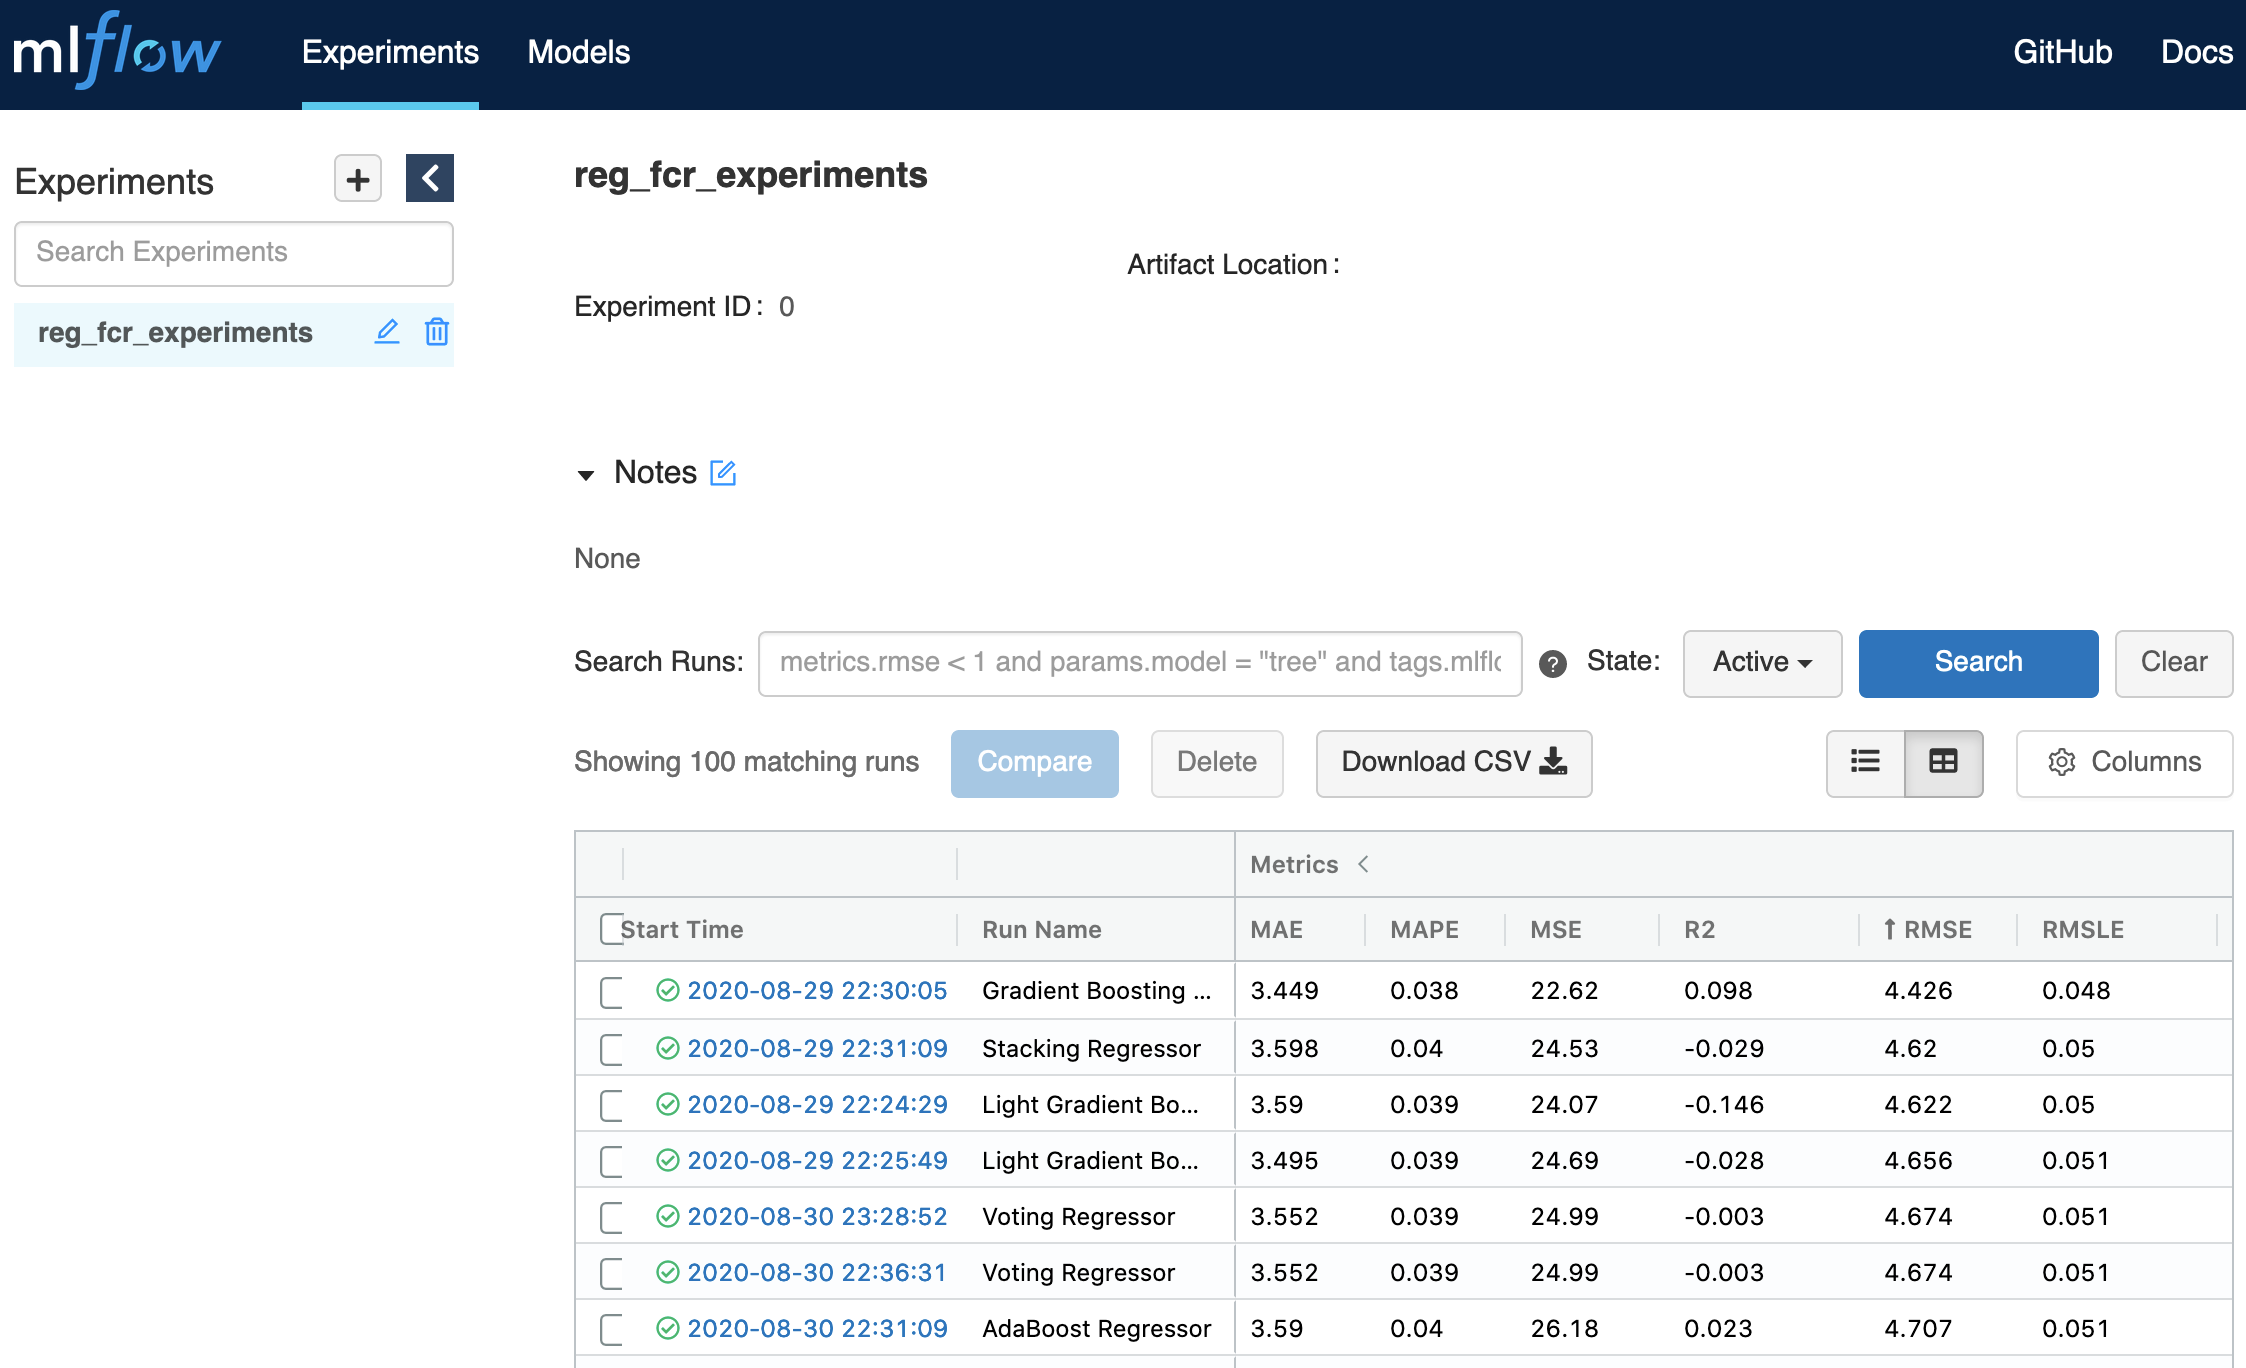

## 9. Sources and References

Matplotlib. Retrieved August 24, 2020, from https://matplotlib.org

Numpy. Retrieved August 24, 2020, from https://numpy.org/

Pandas. Retrieved August 24, 2020, from https://pandas.pydata.org/

Pycaret. (2020, May 11). Retrieved August 24, 2020, from https://pycaret.org/

Python. Retrieved August 24, 2020, from https://www.python.org/

Scikit Learn: Learn. Retrieved August 24, 2020, from https://scikit-learn.org/

Seaborn. Retrieved August 24, 2020, from https://seaborn.pydata.org/